In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns

# 1.Exploratory Data Analysis 

In [4]:
df=pd.read_csv("Admission_Predict.csv")
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(400, 9)

In [6]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
df.keys()

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
df.keys()
color_dict = dict({1:'brown',
                  2:'green',
                  3: 'orange',
                  4: 'red',
                   5:'purple'})

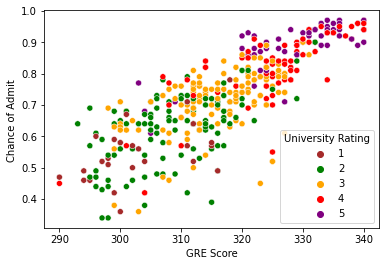

In [9]:
g=sns.scatterplot(x='GRE Score',y='Chance of Admit ',data=df,hue='University Rating',palette=color_dict, 
                   legend='full')



<AxesSubplot:xlabel='SOP', ylabel='Chance of Admit '>

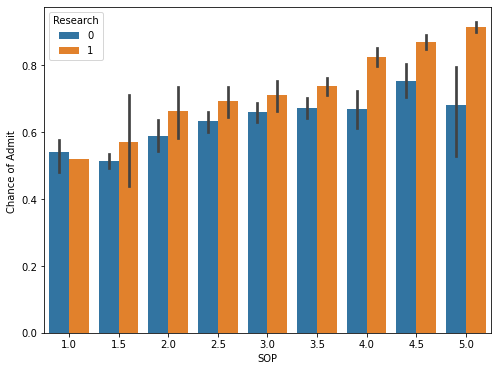

In [10]:
plt.figure(figsize=(8, 6))
sns.barplot(x='SOP',y='Chance of Admit ',data=df,hue='Research')

#### this shows that people who have done research  have high chances 
#### of admission plus those people also have high ratings of SOPs 

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit '>

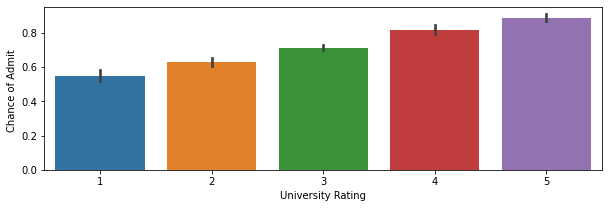

In [11]:
plt.figure(figsize=(10, 3))
sns.barplot(x='University Rating',y='Chance of Admit ',data=df)

thhis shows that student who belongs to those universities which have high ratings have high chances of getting admission

<AxesSubplot:xlabel='LOR ', ylabel='Chance of Admit '>

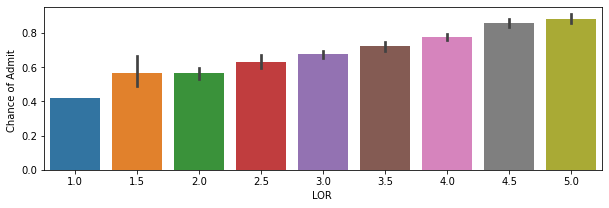

In [50]:
plt.figure(figsize=(10, 3))
sns.barplot(x='LOR ',y='Chance of Admit ',data=df)

### this shows that student having high rating of letter of recommendation have high chances of getting admission

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit '>

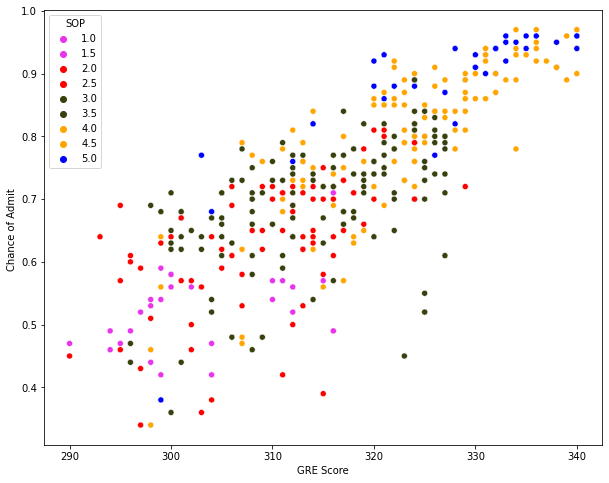

In [12]:
plt.figure(figsize=(10, 8))
#1.0, 2.5, 2.0, 3.0, 1.5, 3.5, 4.5, 5.0
color_dict = dict({
                     1.0:'#e834eb',
                     1.5:'#e834eb',
                     1.6:'#e834eb',
                     2.0:'red',
                     2.4:'red',
                     2.5:'red',
                     3.2: '#38400e',
                     3.0:'#38400e',
                     3.5:'#38400e',
                     4.0: 'orange',
                     4.5:'orange',
                     4.8:'blue',
                     5.0:'blue'})

sns.scatterplot(x='GRE Score',y='Chance of Admit ',data=df,hue='SOP',palette=color_dict, 
                   legend='full')


#### the graph shows that mostly those students who are scoring hogh in GRE and have high rating of SOPs have more chance to get admission but there are some blue dots between GRE score 300-310 which shows that student having good SOPs and a slight lower GRE score also have chances of admission

GRE Score


<Figure size 360x360 with 0 Axes>

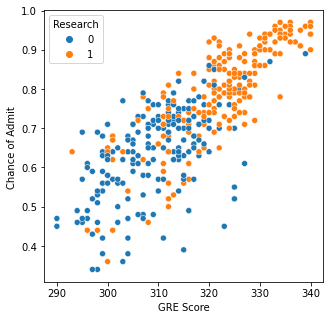

TOEFL Score


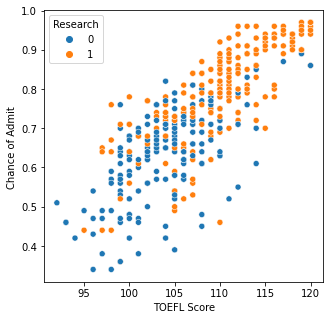

University Rating


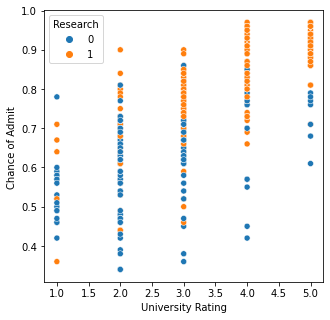

SOP


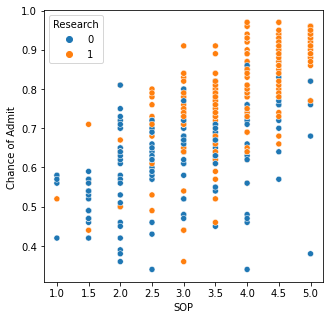

LOR 


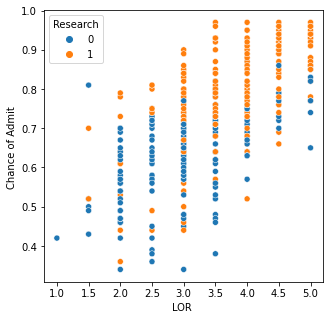

CGPA


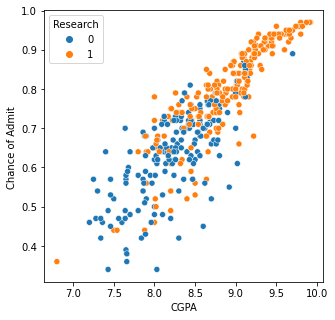

Research


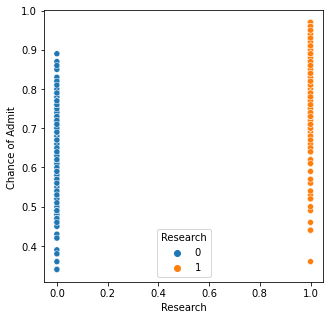

Chance of Admit 


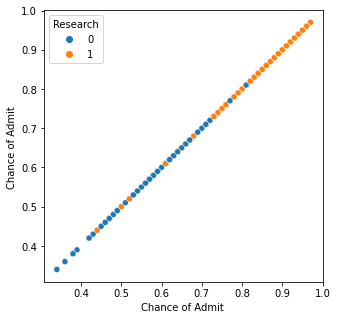

In [14]:
plt.figure(figsize=(5, 5))
df2=df.drop('Chance of Admit ',axis=1)
df2=df.drop(["Serial No."],axis=1)
for k in df2.keys(): 
   print(k)
   plt.figure(figsize=(5, 5))
   sns.scatterplot(x=k,y='Chance of Admit ',hue='Research',data=df)
   plt.show()

### above scatter plots shows that students whohave done research have high chances of getting admission

In [162]:
df2.keys()

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit '>

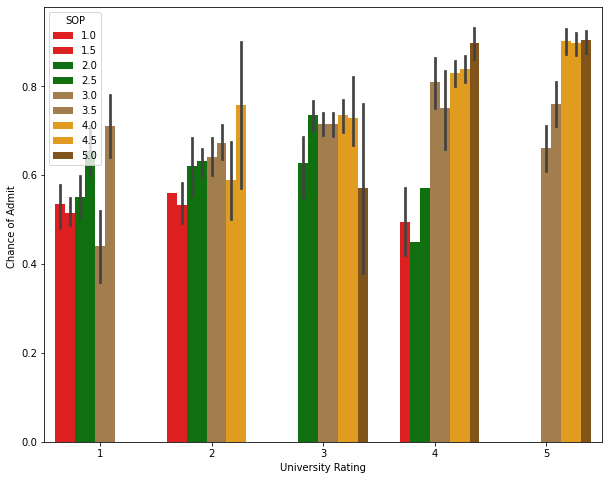

In [16]:
plt.figure(figsize=(10, 8))
#1.0, 2.5, 2.0, 3.0, 1.5, 3.5, 4.5, 5.0
color_dict = dict({
                     1.0:'red',
                     1.5:'red',
                     1.6:'red',
                     2.0:'green',
                     2.4:'green',
                     2.5:'green',
                     3.2: '#b08041',
                     3.0:'#b08041',
                     3.5:'#b08041',
                     4.0: 'orange',
                     4.5:'orange',
                     4.8:'#915609',
                     5.0:'#915609'})

sns.barplot(x='University Rating',y='Chance of Admit ',data=df,hue='SOP',palette=color_dict, 
                 )


### the graph shows that high university ratings means high chances if admission and high university rating also have high ratings on SOP
### while university with low ratings don't even have a single SOP of 5.0 rating 
### plus some good university rating in 4 have SOP's pf 1 to 1.5 ratings which is bad 

# 2. train test split

In [17]:
from sklearn.model_selection import train_test_split


In [18]:

## split data
X=df.drop('Chance of Admit ',axis=1)
y=df['Chance of Admit ']
print("shape of X",X.shape)
print("shape of y",y.shape)

shape of X (400, 8)
shape of y (400,)


In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=51)
print("shape of X_train",X_train.shape)
print("shape of X_test",X_test.shape)
print("shape of y_train",y_train.shape)
print("shape of y_test",y_test.shape)

shape of X_train (320, 8)
shape of X_test (80, 8)
shape of y_train (320,)
shape of y_test (80,)


# 3.Feature Scaling

In [21]:


from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

# 4.Model Training
### -Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [24]:
lr.fit(X_train,y_train)


LinearRegression()

In [217]:
lr.coef_ ## learning co-efficient value Beta1,Beta2..etc

lr.intercept_

0.3660620349223933

In [25]:

lr.predict(X_test) ##predict 

array([0.76258854, 0.52570158, 0.76643398, 0.66670152, 0.67416033,
       0.92694564, 0.59745121, 0.93771701, 0.66004273, 0.80972035,
       0.79864157, 0.62472432, 0.67128028, 0.6702981 , 0.66478254,
       0.8131289 , 0.61017368, 0.71132633, 0.46741183, 0.56017483,
       0.76652383, 0.52860467, 0.83299047, 0.60131447, 0.69576939,
       0.56367694, 0.75689209, 0.8580729 , 0.71777632, 0.6907131 ,
       0.64720546, 0.60240095, 0.99533459, 0.57861934, 0.67340543,
       0.78839197, 0.77023609, 0.60119416, 0.90854216, 0.79805703,
       0.51872191, 0.78980372, 0.95464129, 0.53050666, 0.63572474,
       0.84047021, 0.74237429, 0.42519242, 0.80651642, 0.71294203,
       0.68981393, 0.57229949, 0.61491534, 0.91277444, 0.75869654,
       0.69651603, 0.84600627, 0.53148676, 0.93065601, 0.85034376,
       0.86355845, 0.55936505, 0.89320848, 0.69408614, 0.85180213,
       0.94217064, 0.55784972, 0.89083436, 0.71320758, 0.98105427,
       0.72254348, 0.57251839, 0.86626987, 0.63006268, 0.73377

## Checking Accuracy of Model

In [219]:

lr.score(X_test,y_test)

0.7806245282626253

In [26]:
predicted = lr.predict(X_test)

Text(0, 0.5, 'Actual value')

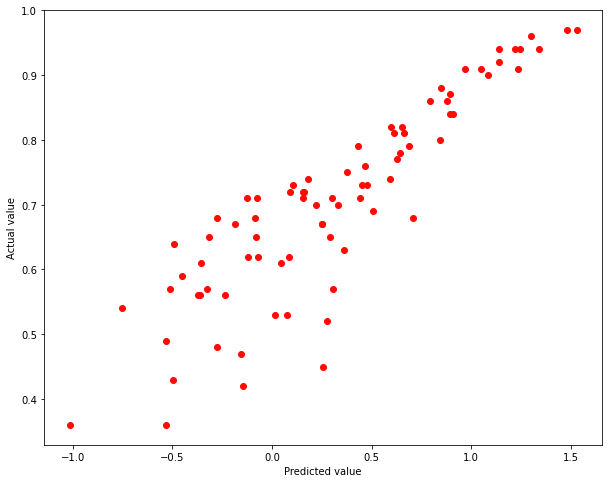

In [227]:
plt.figure(figsize=(10, 8))
plt.plot(predicted , y_test, 'o')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')